## Research Question ##

1) Who were the passangers on the Titanic ? (Ages, Gender, Class,... etc)

2) What deck were the passangers on ad how does that relate to their class ?

3) Whee did the passangers come from ?

4) Who was alone and who was with family ?

Note: Following titanic dataset and code has been provided by the Kaggle for public studies and interests.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas import Series, DataFrame

In [2]:
# Put train.csv file into a dataframe - titanic_df
titanic_df = pd.read_csv( './data/train.csv' )

In [3]:
titanic_df.head( 10 )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Check which variable contains NULL variables
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Question 1) Who were the passangers on the Titanic ? (Ages, Gender, Class,... etc)

C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


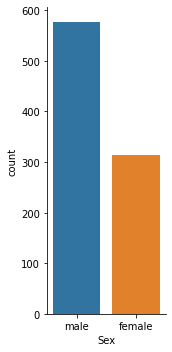

In [5]:
# factorplot passes the column argument and where the data comes from (dataframe)
# Here, I would want to display the gender count on board at Titanic
figure01 = sns.factorplot('Sex', data=titanic_df, kind='count', aspect=0.5 )

C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


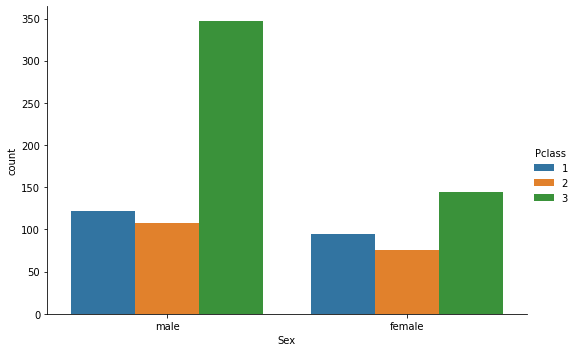

In [6]:
# The Pclass distribution indicates majority of people at class-3 are males
sns.factorplot('Sex', data=titanic_df, hue='Pclass', kind='count', aspect=1.5 )

C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


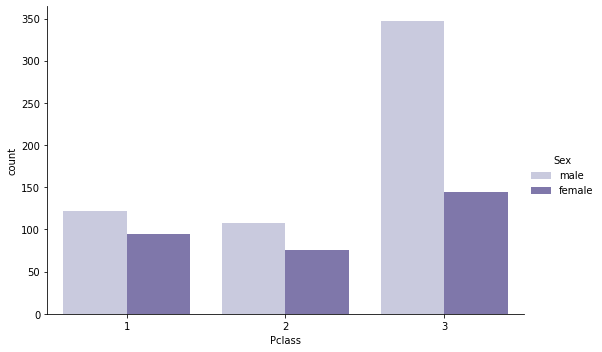

In [7]:
sns.factorplot('Pclass', data=titanic_df, hue='Sex', kind='count', palette='Purples', aspect=1.5 )

In [8]:
# I also want to take a look at children ratio to understand the difference between males,females, and children -- function used

In [9]:
def male_female_child( passenger ):
    age, sex = passenger
    
    if( age < 16 ):
        return 'child'
    else:
        return sex

In [10]:
titanic_df[ 'person' ] = titanic_df[[ 'Age', 'Sex' ]].apply( male_female_child, axis = 1 )

In [11]:
titanic_df.head( 10 )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


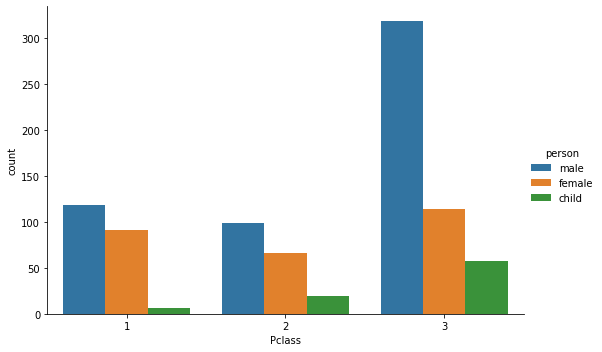

In [12]:
# instead of seperating the classes by two genders, this also take account 'child' as a factor
sns.factorplot('Pclass', data=titanic_df, hue='person', kind='count', aspect=1.5 )

<AxesSubplot:>

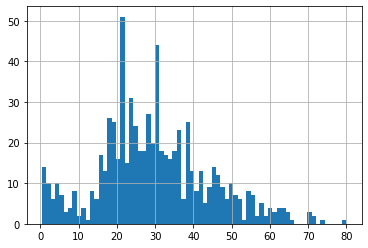

In [13]:
titanic_df[ 'Age' ].hist( bins=70 )

In [14]:
titanic_df[ 'Age' ].mean()

29.69911764705882

In [15]:
titanic_df[ 'person' ].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

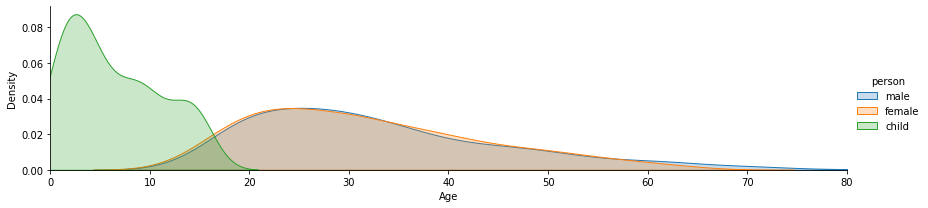

In [16]:
fig01 = sns.FacetGrid( titanic_df, hue='person', aspect=4 )
fig01.map( sns.kdeplot, 'Age', shade=True )

oldest = titanic_df[ 'Age' ].max()
fig01.set( xlim=( 0, oldest ))

fig01.add_legend()

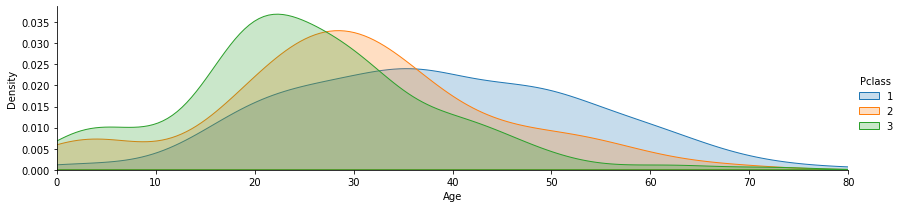

In [17]:
fig02 = sns.FacetGrid( titanic_df, hue='Pclass', aspect=4 )
fig02.map( sns.kdeplot, 'Age', shade=True )

oldest = titanic_df[ 'Age' ].max()
fig02.set( xlim=( 0, oldest ))

fig02.add_legend()

In [18]:
deck = titanic_df[ 'Cabin' ].dropna()
deck.head( 10 )

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
Name: Cabin, dtype: object

C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


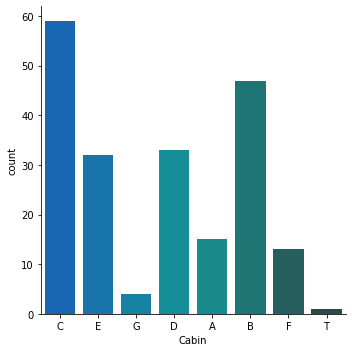

In [19]:
levels = []

for level in deck:
    levels.append( level[0] )

cabin_df = DataFrame( levels )
cabin_df.columns = [ 'Cabin' ]

sns.factorplot( 'Cabin', data=cabin_df, kind='count', palette='winter_d', aspect=1.0 )

In [20]:
# Redefine where everything does not equal T
cabin_df = cabin_df[ cabin_df.Cabin != 'T' ]

C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


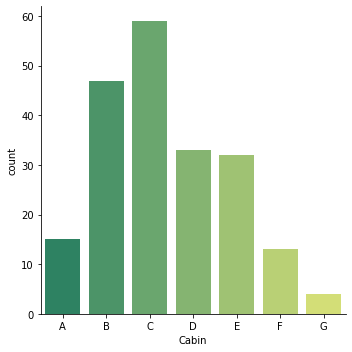

In [21]:
sns.factorplot( 'Cabin', data=cabin_df, kind='count', palette='summer', aspect=1.0, order=[ 'A', 'B', 'C', 'D', 'E', 'F', 'G' ] )

C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


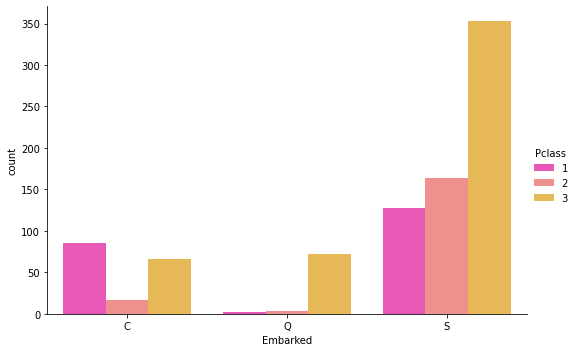

In [22]:
# Embarked implies where the passangers came from
sns.factorplot('Embarked', data=titanic_df, hue='Pclass', kind='count', palette='spring', aspect=1.5, order = [ 'C', 'Q', 'S' ] )


In [23]:
titanic_df[ 'Alone' ] = titanic_df.SibSp + titanic_df.Parch
titanic_df[ 'Alone' ].head( 20 )

0     1
1     1
2     0
3     1
4     0
5     0
6     0
7     4
8     2
9     1
10    2
11    0
12    0
13    6
14    0
15    0
16    5
17    0
18    1
19    0
Name: Alone, dtype: int64

In [24]:
# families_df = titanic_df.drop( titanic_df[ ( titanic_df.Alone == 0 ) ]) 
# families_df[ 'Alone' ].head( 20 )

titanic_df[ 'Alone' ].loc[ titanic_df[ 'Alone' ] > 0 ] = 'With Family'

titanic_df[ 'Alone' ].loc[ titanic_df[ 'Alone' ] == 0 ] = 'Alone'

C:\Users\hkpar\AppData\Local\Temp/ipykernel_9040/1742490069.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df[ 'Alone' ].loc[ titanic_df[ 'Alone' ] > 0 ] = 'With Family'


In [25]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


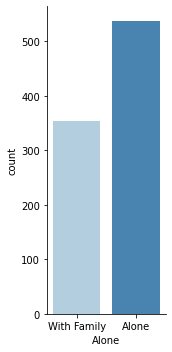

In [26]:
sns.factorplot('Alone', data=titanic_df, kind='count', palette='Blues', aspect = 0.5 )


C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


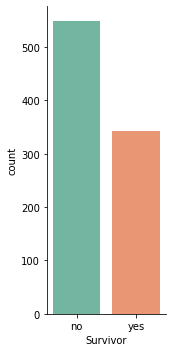

In [27]:
titanic_df[ 'Survivor' ] = titanic_df.Survived.map( { 0 : 'no', 1 : 'yes' })

sns.factorplot('Survivor', data=titanic_df, kind='count', palette='Set2', aspect = 0.5 )


C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


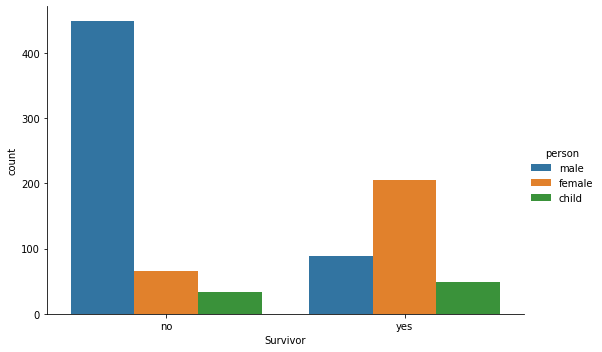

In [28]:
sns.factorplot('Survivor', data=titanic_df, hue='person', kind='count', aspect=1.5 )

C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


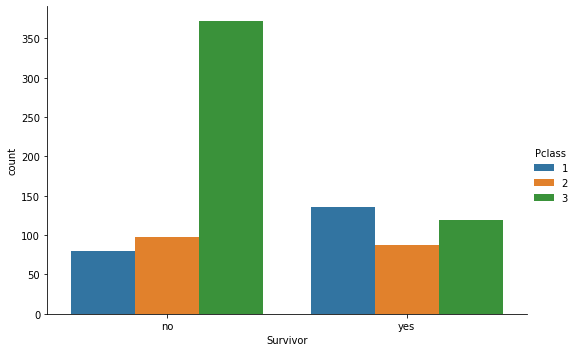

In [29]:
sns.factorplot('Survivor', data=titanic_df, hue='Pclass', kind='count', aspect=1.5 )

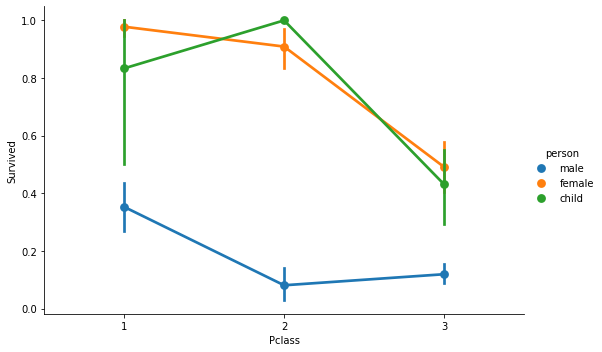

In [32]:
sns.factorplot('Pclass', 'Survived', hue='person', aspect=1.5 , data=titanic_df )

C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


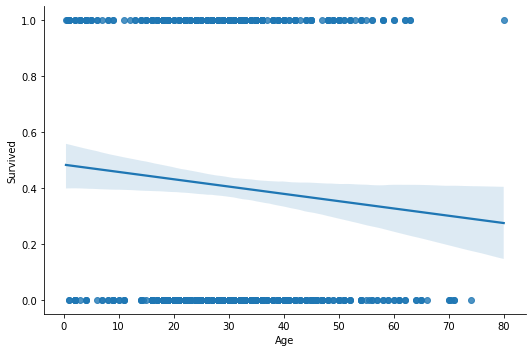

In [33]:
sns.lmplot('Age', 'Survived', aspect=1.5 , data=titanic_df )

C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


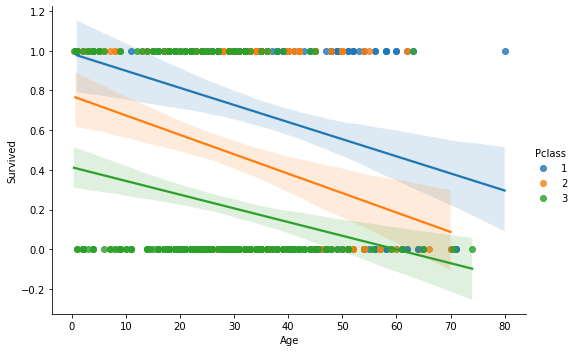

In [34]:
sns.lmplot('Age', 'Survived', hue='Pclass', aspect=1.5 , data=titanic_df )

C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


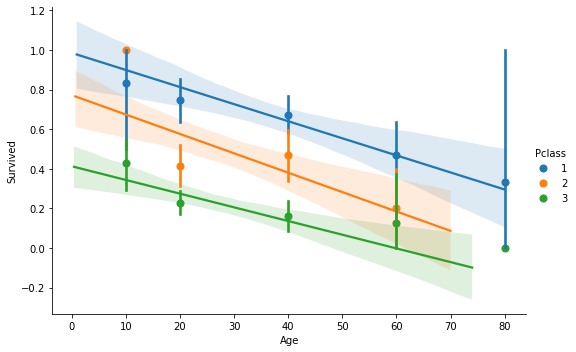

In [35]:
# instead of having every data points visible (the dots)
generations = [ 10, 20, 40, 60, 80 ]

sns.lmplot('Age', 'Survived', hue = 'Pclass', aspect = 1.5 , data=titanic_df, x_bins = generations )

C:\Users\hkpar\anaconda3\envs\tensorflow_env01\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


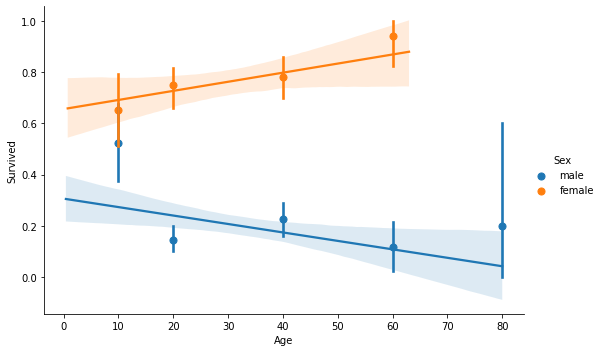

In [36]:
sns.lmplot('Age', 'Survived', hue = 'Sex', aspect=1.5 , data=titanic_df, x_bins = generations )